<a href="https://colab.research.google.com/github/KarenZully123/API2024/blob/main/Te_damos_la_bienvenida_a_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Te damos la bienvenida a Colab</h1>
</div>

<div class="markdown-google-sans">
  <h2>&#40;Novedad&#41; Prueba la API de Gemini</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Si ya conoces Colab, echa un vistazo a este vídeo para obtener información sobre las tablas interactivas, la vista del historial de código ejecutado y la paleta de comandos.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  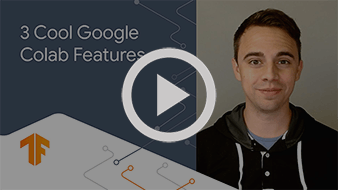
  </a>
</center>

In [1]:
import pandas as pd
data = pd.read_csv("lung_cancer_examples.csv")
data
X = data[["Age","Smokes","AreaQ","Alkhol"]]
y = data["Result"]

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 995ms/step - accuracy: 0.5763 - loss: 7.7564 - val_accuracy: 0.6000 - val_loss: 7.1052
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5763 - loss: 7.1090 - val_accuracy: 0.6000 - val_loss: 6.4178
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5971 - loss: 5.9470 - val_accuracy: 0.6000 - val_loss: 5.7371
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5450 - loss: 6.1429 - val_accuracy: 0.6000 - val_loss: 5.1081
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5555 - loss: 5.3183 - val_accuracy: 0.6000 - val_loss: 4.5256
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5659 - loss: 4.5562 - val_accuracy: 0.6000 - val_loss: 3.9441
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5659 - loss: 3.9515 - val_accuracy: 0.6000 - val_loss: 3.3454
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5659 - loss: 3.3883 - val_accuracy: 0.6000 - val_loss: 2.7578
Epo

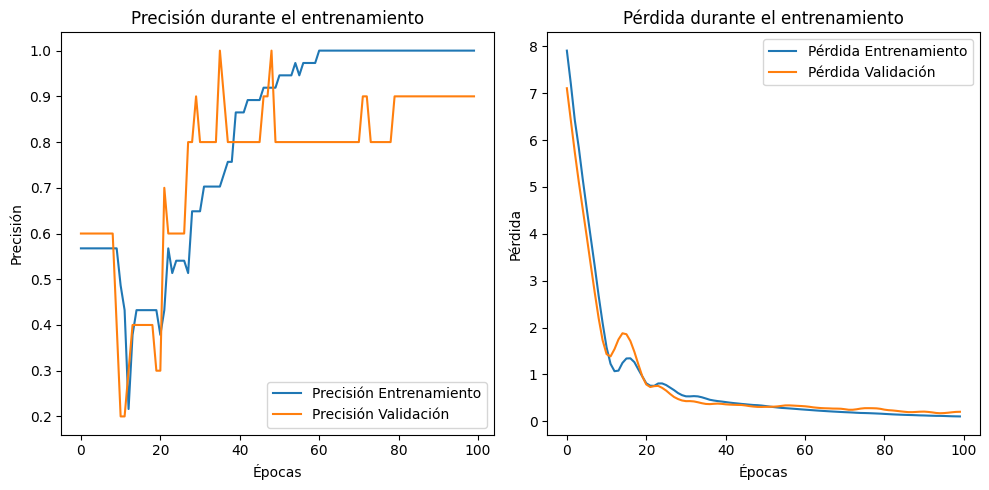

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.9167 - loss: 0.1543
Pérdida en el conjunto de prueba: 0.1543
Precisión en el conjunto de prueba: 0.9167


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

# Definir el modelo
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid') # Capa de salida para clasificación binaria
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

import matplotlib.pyplot as plt

# Entrenar el modelo y guardar el historial
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Acceder a los datos del historial
history_dict = history.history
print(history_dict.keys()) # Para ver qué datos están disponibles

# Graficar la precisión
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1) # 1 fila, 2 columnas, primer gráfico
plt.plot(history_dict['accuracy'], label='Precisión Entrenamiento')
plt.plot(history_dict['val_accuracy'], label='Precisión Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Graficar la pérdida
plt.subplot(1, 2, 2) # 1 fila, 2 columnas, segundo gráfico
plt.plot(history_dict['loss'], label='Pérdida Entrenamiento')
plt.plot(history_dict['val_loss'], label='Pérdida Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Pérdida en el conjunto de prueba: {loss:.4f}')
print(f'Precisión en el conjunto de prueba: {accuracy:.4f}')


<div class="markdown-google-sans">
  <h2>¿Qué es Colaboratory?</h2>
</div>

Colab, también conocido como "Colaboratory", te permite programar y ejecutar Python en tu navegador con las siguientes ventajas:
- No requiere configuración
- Acceso a GPUs sin coste adicional
- Permite compartir contenido fácilmente

Colab puede facilitar tu trabajo, ya seas <strong>estudiante</strong>, <strong>científico de datos</strong> o <strong>investigador de IA</strong>. No te pierdas el vídeo de <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Introducción a Colab</a> para obtener más información. O simplemente empieza con los pasos descritos más abajo.

<div class="markdown-google-sans">

## <strong>Primeros pasos</strong>
</div>

El documento que estás leyendo no es una página web estática, sino un entorno interactivo denominado <strong>cuaderno de Colab</strong> que te permite escribir y ejecutar código.

Por ejemplo, a continuación se muestra una <strong>celda de código</strong> con una breve secuencia de comandos de Python que calcula un valor, lo almacena en una variable e imprime el resultado:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

Si quieres ejecutar el código de la celda anterior, haz clic para seleccionarlo y pulsa el botón de reproducir situado a la izquierda del código o usa la combinación de teclas "Comando/Ctrl + Intro". Para editar el código, solo tienes que hacer clic en la celda.

Las variables que definas en una celda se pueden usar después en otras celdas:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Los cuadernos de Colab te permiten combinar <strong>código ejecutable</strong> y <strong>texto enriquecido</strong> en un mismo documento, además de <strong>imágenes</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> y mucho más. Los cuadernos que creas en Colab se almacenan en tu cuenta de Google Drive. Puedes compartir tus cuadernos de Colab fácilmente con compañeros de trabajo o amigos, lo que les permite comentarlos o incluso editarlos. Consulta más información en <a href="/notebooks/basic_features_overview.ipynb">Información general sobre Colab</a>. Para crear un cuaderno de Colab, puedes usar el menú Archivo que aparece arriba o bien acceder al enlace para <a href="http://colab.research.google.com#create=true">crear un cuaderno de Colab</a>.

Los cuadernos de Colab son cuadernos de Jupyter alojados en Colab. Para obtener más información sobre el proyecto Jupyter, visita <a href="https://www.jupyter.org">jupyter.org</a>.

<div class="markdown-google-sans">

## Ciencia de datos
</div>

Con Colab, puedes aprovechar toda la potencia de las bibliotecas más populares de Python para analizar y visualizar datos. La celda de código de abajo utiliza <strong>NumPy</strong> para generar datos aleatorios y <strong>Matplotlib</strong> para visualizarlos. Para editar el código, solo tienes que hacer clic en la celda.

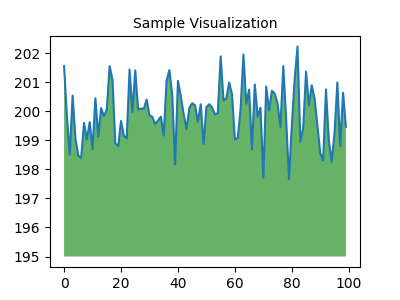

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Puedes importar tus propios datos a los cuadernos de Colab desde tu cuenta de Google Drive, incluidas las hojas de cálculo, y también desde GitHub y muchas fuentes más. Para obtener más información sobre cómo importar datos y cómo se puede usar Colab en la ciencia de datos, consulta los enlaces que aparecen en la sección <a href="#working-with-data">Trabajar con datos</a> más abajo.

<div class="markdown-google-sans">

## Aprendizaje automático
</div>

Con Colab, puedes importar un conjunto de datos de imágenes, entrenar un clasificador de imágenes con dicho conjunto de datos y evaluar el modelo con tan solo usar unas <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">pocas líneas de código</a>. Los cuadernos de Colab ejecutan código en los servidores en la nube de Google, lo que te permite aprovechar la potencia del hardware de Google, incluidas las <a href="#using-accelerated-hardware">GPU y TPU</a>, independientemente de la potencia de tu equipo. Lo único que necesitas es un navegador.

Colab es una herramienta muy utilizada en la comunidad de aprendizaje automático. Estos son algunos ejemplos de las aplicaciones que tiene Colab:
- Dar los primeros pasos con TensorFlow
- Desarrollar y entrenar redes neuronales
- Experimentar con TPUs
- Divulgar datos de investigación sobre IA
- Crear tutoriales

Para ver cuadernos de Colab que demuestran las aplicaciones del aprendizaje automático, consulta los <a href="#machine-learning-examples">ejemplos de aprendizaje automático</a> de abajo.

<div class="markdown-google-sans">

## Más recursos

### Trabajar con cuadernos en Colab

</div>

- [Información general sobre Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guía de Markdown](/notebooks/markdown_guide.ipynb)
- [Importar bibliotecas e instalar dependencias](/notebooks/snippets/importing_libraries.ipynb)
- [Guardar y cargar cuadernos en GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Formularios interactivos](/notebooks/forms.ipynb)
- [Widgets interactivos](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Trabajar con datos
</div>

- [Cargar datos: Drive, Hojas de cálculo y Google Cloud Storage](/notebooks/io.ipynb)
- [Gráficos: visualización de datos](/notebooks/charts.ipynb)
- [Primeros pasos con BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Curso intensivo de aprendizaje automático

<div>

A continuación, se muestran algunos cuadernos del curso online de Google sobre aprendizaje automático. Para obtener más información, consulta el <a href="https://developers.google.com/machine-learning/crash-course/">sitio web del curso completo</a>.
- [Introducción a Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Regresión lineal con tf.keras usando datos sintéticos](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Uso de hardware acelerado
</div>

- [TensorFlow con GPUs](/notebooks/gpu.ipynb)
- [TensorFlow con TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Ejemplos destacados

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">Reemplaza voces con NeMo</a>: usa NeMo, el kit de herramientas de IA conversacional de Nvidia, para sustituir una voz de un fragmento de audio por otra generada por ordenador.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Reentrenamiento de un clasificador de imágenes</a>: crea un modelo de Keras sobre un clasificador de imágenes preparado previamente para que distinga flores.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Clasificación de textos</a>: clasifica las reseñas de películas de IMDb en <em>positivas</em> o <em>negativas</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Transferencia de estilo</a>: utiliza el aprendizaje profundo para transferir el estilo de una imagen a otra.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Codificador universal de frases multilingüe para preguntas y respuestas</a>: utiliza un modelo de aprendizaje automático para contestar preguntas con el conjunto de datos SQuAD.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Interpolación de vídeo</a>: predice lo que ocurre entre el primer y el último fotograma de un vídeo.
